In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame('kc_house_data_small.gl')

[INFO] 1449762513 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to C:\Users\Adam H\Anaconda\lib\site-packages\certifi\cacert.pem
1449762513 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to athoul01@gmail.com and will expire on September 21, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-1240 - Server binary: C:\Users\Adam H\Anaconda\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\ADAMH~1\AppData\Local\Temp\graphlab_server_1449762513.log.0
[INFO] GraphLab Server Version: 1.7.1


In [3]:
sales.shape

(8703, 21)

In [3]:
import numpy as np

In [4]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    
    return(feature_matrix, output_array)

In [5]:
def normalize_features(feature_matrix):
    norms =  np.linalg.norm(feature_matrix, axis = 0)
    normalized_features = feature_matrix/norms
    return(normalized_features, norms)

In [6]:
(train_and_validation, test) = sales.random_split(.8, seed = 1)
(train, validation) = train_and_validation.random_split(.8, seed = 1)

In [7]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [8]:
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

In [9]:
features_train, norms = normalize_features(features_train)
features_test = features_test/norms
features_valid = features_valid/norms

In [12]:
features_test[0]

array([ 0.01345102,  0.01551285,  0.01807473,  0.01759212,  0.00160518,
        0.017059  ,  0.        ,  0.05102365,  0.0116321 ,  0.01564352,
        0.01362084,  0.02481682,  0.01350306,  0.        ,  0.01345386,
       -0.01346927,  0.01375926,  0.0016225 ])

In [13]:
features_train[9]

array([ 0.01345102,  0.01163464,  0.00602491,  0.0083488 ,  0.00050756,
        0.01279425,  0.        ,  0.        ,  0.01938684,  0.01390535,
        0.0096309 ,  0.        ,  0.01302544,  0.        ,  0.01346821,
       -0.01346254,  0.01195898,  0.00156612])

In [18]:
np.sqrt(np.sum((features_test[0] - features_train[9])**2))

0.059723593716661257

In [19]:
np.linalg.norm(features_test[0] - features_train[9])

0.059723593716661257

In [55]:
query_house = features_test[0]
for i in xrange(len(features_train[0:10])):
    print "House :" + str(i)
    diff = features_train[i] - query_house
    print np.sqrt(np.sum(diff**2))

House :0
0.060274709173
House :1
0.0854688114883
House :2
0.0614994643712
House :3
0.0534027397882
House :4
0.0584448406394
House :5
0.0598792151018
House :6
0.0546314049726
House :7
0.0554310832416
House :8
0.052383627841
House :9
0.0597235937167


In [28]:
for i in xrange(3):
    print features_train[i] - features_test[0]

[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
   2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
  -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
  -5.14364795e-03   6.69281453e-04]
[  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
   7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
  -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
  -2.89330197e-03   1.47606982e-03]
[  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
   1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
   0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
  -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
   3.72914476e-03   1.64764925e-03]


In [29]:
print features_train[0:3] - features_test[0]

[[  0.00000000e+00  -3.87821276e-03  -1.20498190e-02  -1.05552733e-02
    2.08673616e-04  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03  -5.50336860e-03  -2.48168183e-02
   -1.63756198e-04   0.00000000e+00  -1.70072004e-05   1.30577772e-05
   -5.14364795e-03   6.69281453e-04]
 [  0.00000000e+00  -3.87821276e-03  -4.51868214e-03  -2.26610387e-03
    7.19763456e-04   0.00000000e+00   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -3.47633726e-03   1.30705004e-03  -1.45830788e-02
   -1.91048898e-04   6.65082271e-02   4.23240653e-05   6.22415897e-06
   -2.89330197e-03   1.47606982e-03]
 [  0.00000000e+00  -7.75642553e-03  -1.20498190e-02  -1.30002801e-02
    1.60518166e-03  -8.52950206e-03   0.00000000e+00  -5.10236549e-02
    0.00000000e+00  -5.21450589e-03  -8.32384500e-03  -2.48168183e-02
   -3.13866046e-04   0.00000000e+00   4.71047219e-05   1.56530415e-05
    3.72914476e-03   1.64764925e-03]]


In [30]:
results = features_train[0:3] - features_test[0]
print results[0] - (features_train[0]-features_test[0])
print results[1] - (features_train[1] - features_test[0])
print results[2] - (features_train[2] - features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [31]:
diff = features_train - features_test[0]

In [34]:
print diff[-1].sum()

-0.0934339605842


In [35]:
print np.sum(diff**2, axis = 1)[15]
print np.sum(diff[15]**2)

0.00330705902879
0.00330705902879


In [36]:
distances = np.sqrt(np.sum(diff**2, axis = 1))

In [37]:
print distances[100]

0.0237082324496


In [38]:
def compute_distances(features_instances, feature_query):
    diff = features_instances - feature_query
    distances = np.sqrt(np.sum(diff**2, axis = 1))
    
    return distances

In [44]:
query_3 = compute_distances(features_train, features_test[2])

In [51]:
closest = min(query_3)
print closest

0.00286049526751


In [48]:
np.where(query_3 == closest)

(array([382], dtype=int64),)

In [60]:
np.argsort(query_3)[0:2]

382

In [50]:
query_3[382]

0.0028604952675079271

In [53]:
train[382]

{'bathrooms': 1.5,
 'bedrooms': 3.0,
 'condition': 3L,
 'constant': 1L,
 'date': datetime.datetime(2015, 3, 12, 0, 0, tzinfo=GMT +0.0),
 'floors': 1.0,
 'grade': 7L,
 'id': '4324200060',
 'lat': 47.42161059,
 'long': -122.17388886,
 'price': 249000L,
 'sqft_above': 1010L,
 'sqft_basement': 690L,
 'sqft_living': 1700.0,
 'sqft_living15': 1440.0,
 'sqft_lot': 8247L,
 'sqft_lot15': 8400.0,
 'view': 0L,
 'waterfront': 0L,
 'yr_built': 1970L,
 'yr_renovated': 0L,
 'zipcode': '98031'}

In [61]:
def k_nearest_neighbors(k, feature_train, features_query):
    # Compute Distances; Dependent on compute_distances func
    distances = compute_distances(feature_train, features_query)
    neighbors = np.argsort(distances)[0:k]  
    
    
    return neighbors

In [64]:
k_s = k_nearest_neighbors(4, features_train, features_test[2])

In [72]:
k_s[0:2]

array([ 382, 1149], dtype=int64)

In [136]:
def predict_output_of_query(k, features_train, output_train, features_query):
    # Dependent on compute_distances and k_nearest_neighbors
    k_neighbors = k_nearest_neighbors(k, features_train, features_query)
    #print k_neighbors
    k_prices = output_train[[k_neighbors[0:k]]]
    #print k_prices
    prediction = k_prices.sum()/k
    
    return prediction

In [82]:
indexs = k_s[[0, 1, 2, 3]]
print indexs

[ 382 1149 4087 3142]


In [99]:
predict_output_of_query(4, features_train, output_train, features_test[2])

[ 382 1149 4087 3142]
[249000 477000 499950 430000]


413987

In [102]:
xrange(features_test.shape[0])

xrange(1741)

In [134]:
def predict_output(k, features_train, output_train, features_query):
    predictions = []
    for i in xrange(features_query.shape[0]):
        predictions.append(predict_output_of_query(k, features_train, output_train, features_query[i]))
          
    
    return predictions

In [137]:
predict_output(10, features_train, output_train, features_test[0:10])

[881300,
 431860,
 460595,
 430200,
 766750,
 667420,
 350032,
 512800,
 484000,
 457235]

In [130]:
t = features_test[0:10].shape

In [131]:
t[0]

10L

In [145]:
rss_all = []
for k in range(1, 16):
    print str(k) + "nearest neighbors"
    prediction = predict_output(k, features_train, output_train, features_valid)
    rss = ((output_valid - prediction)**2).sum()
    print rss
    rss_all.append(rss)
    

1nearest neighbors
105453830251561
2nearest neighbors
83445073036317
3nearest neighbors
72692113667429
4nearest neighbors
71946729679356
5nearest neighbors
69846516027353
6nearest neighbors
68899557352960
7nearest neighbors
68341986155264
8nearest neighbors
67361700020962
9nearest neighbors
68372752298062
10nearest neighbors
69335060576786
11nearest neighbors
69523884081979
12nearest neighbors
69049991793212
13nearest neighbors
70011272351177
14nearest neighbors
70908725305267
15nearest neighbors
71106956486642


In [147]:
import matplotlib.pyplot as plt
%matplotlib inline

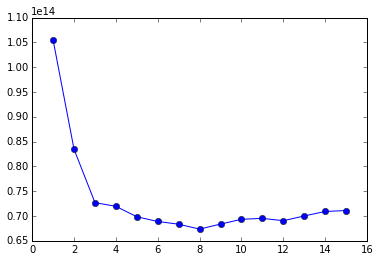

In [148]:
kvals = range(1, 16)
plt.plot(kvals, rss_all, 'bo-')

In [149]:
test_pred = predict_output(8, features_train, output_train, features_test)

In [150]:
test_rss = ((output_test - test_pred)**2).sum()

In [152]:
print test_rss

133118842702196
